# Exploration

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score

In [12]:
# Load data
startup_list = pd.read_csv('../../data/raw/startup_list_seminar.csv')
startup_list.head()

,name,state,linkedin_industry,website_url
0,itravel,Nordrhein-Westfalen,Tourism,https://www.itravel.de/
1,ZOONO GERMANY,Nordrhein-Westfalen,Life Science & Healthcare,https://www.zoonodeutschland.com/
2,kunveno,NaN,IT and Communications,https://kunveno.de
3,t2k: Text to Knowledge,Sachsen,IT and Communications,https://text2knowledge.de
4,Scopas,Berlin,IT and Communications,https://www.scopas.io/


In [13]:
# Check for na values
startup_list.isna().sum()

name                   0
state                 10
linkedin_industry    242
website_url            0
dtype: int64

In [14]:
# Drop na values
startup_list.dropna(inplace=True)

In [15]:
# Check unique linkedin industries
unique_industries = startup_list['linkedin_industry'].unique()
print(f"Unique industries: {unique_industries}\n")

unique_industries_count = startup_list['linkedin_industry'].nunique()
print(f"Number of unique industries: {unique_industries_count}")

Unique industries: ['Tourism' 'Life Science & Healthcare' 'IT and Communications' 'Education'
 'Chemicals/Pharmaceuticals' 'Energy & Electricity' 'Other'
 'Industrial & Basic Materials' 'Nutrition & Consumables' 'Consulting'
 'Sports & Amusement/Gaming incl. Online'
 'Automotive, Logistics & Mobility' 'Finance & Insurance'
 'Agriculture & Forestry' 'Construction/Real Estate'
 'Media, Arts & Entertainment' 'Water, Waste Treatment & Recycling'
 'Human Resources' 'Textiles' 'Security']

Number of unique industries: 20


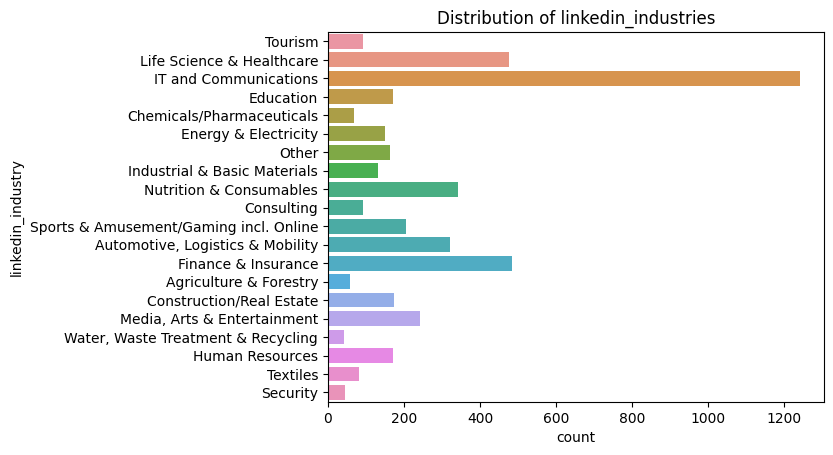

In [16]:
# Visualize distribution of linkedin_industries
sns.countplot(data=startup_list, y='linkedin_industry')
plt.title("Distribution of linkedin_industries")
plt.show()

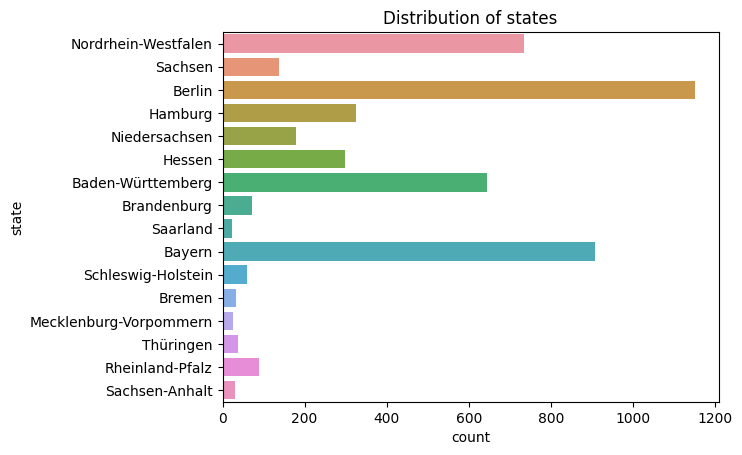

In [17]:
# Visualize distribution of states
sns.countplot(data=startup_list, y='state')
plt.title("Distribution of states")
plt.show()

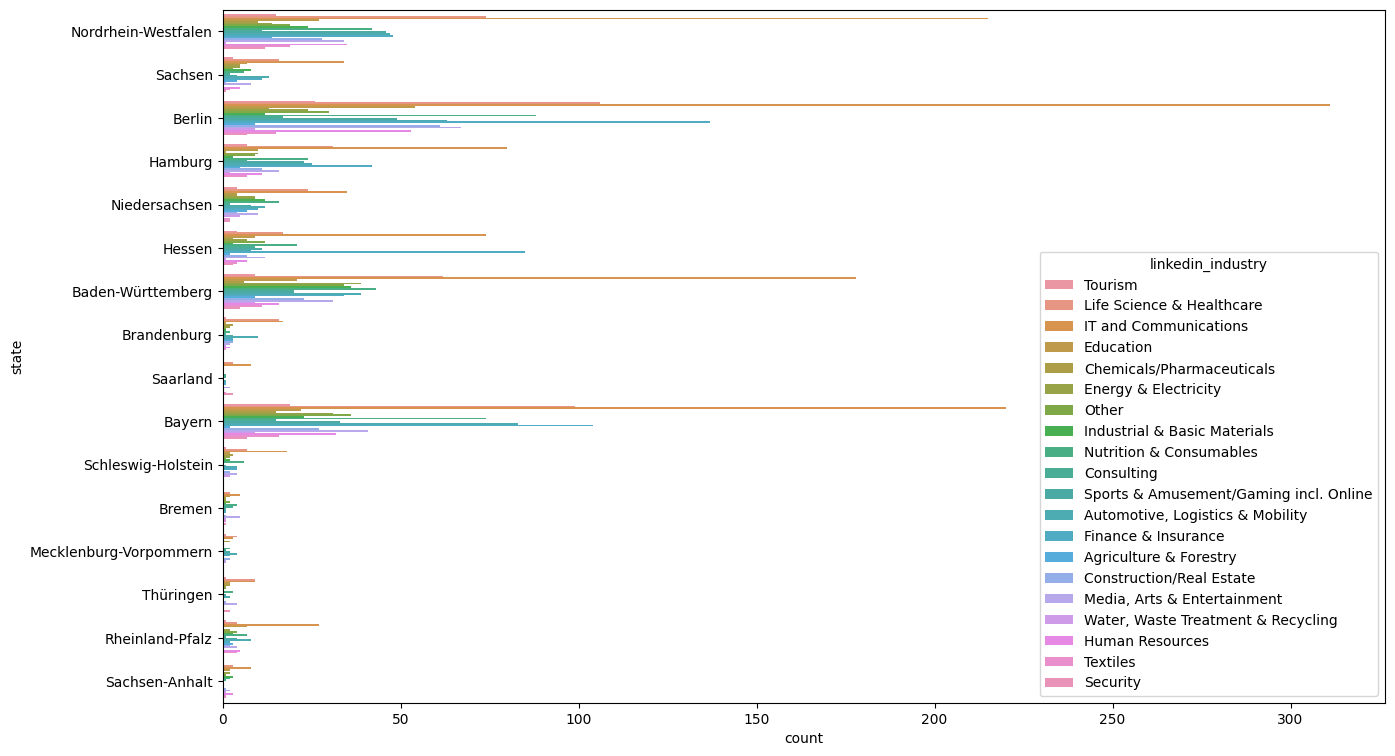

In [18]:
# Distribution of linkedin_industries w.r.t. state
plt.figure(figsize=(15, 9))
sns.countplot(data=startup_list, y='state', hue='linkedin_industry')
plt.show()

## Calculate Silhouette Score for GICS Clustering

In [19]:
# Drop website_url because it has too many distinct values for encoding
startup_list = startup_list.drop(['name', 'website_url'], axis=1)
startup_list

,state,linkedin_industry
0,Nordrhein-Westfalen,Tourism
1,Nordrhein-Westfalen,Life Science & Healthcare
3,Sachsen,IT and Communications
4,Berlin,IT and Communications
5,Nordrhein-Westfalen,Education
...,...,...
4995,Berlin,Industrial & Basic Materials
4996,Baden-Württemberg,IT and Communications
4997,Brandenburg,Other
4998,Berlin,"Automotive, Logistics & Mobility"


In [20]:
# Convert columns in categorical data type
#startup_list['name'] = startup_list['name'].astype('category')
startup_list['state'] = startup_list['state'].astype('category')
startup_list['linkedin_industry'] = startup_list['linkedin_industry'].astype('category')

In [21]:
# Encode startup list
startup_list_encoded = pd.get_dummies(startup_list, columns=['state'], dtype='int')
startup_list_encoded

,linkedin_industry,state_Baden-Württemberg,state_Bayern,state_Berlin,state_Brandenburg,state_Bremen,state_Hamburg,state_Hessen,state_Mecklenburg-Vorpommern,state_Niedersachsen,state_Nordrhein-Westfalen,state_Rheinland-Pfalz,state_Saarland,state_Sachsen,state_Sachsen-Anhalt,state_Schleswig-Holstein,state_Thüringen
0,Tourism,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Life Science & Healthcare,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,IT and Communications,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,IT and Communications,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Education,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Industrial & Basic Materials,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,IT and Communications,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4997,Other,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4998,"Automotive, Logistics & Mobility",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Create mapping for 'linkedin_industry'
industry_mapping = {category: index for index, category in enumerate(startup_list_encoded['linkedin_industry'].unique())}

# Map 'industry' and 'name' categories to integers
startup_list_encoded['linkedin_industry'] = startup_list_encoded['linkedin_industry'].map(industry_mapping)

In [23]:
# Extract GICS labels
gics_labels = startup_list_encoded['linkedin_industry']

# Calculate silhouette coefficient
sil_score_gics = silhouette_score(startup_list_encoded, gics_labels)

print(f"Silhoutte Score of GICS is {sil_score_gics}")

Silhoutte Score of GICS is 0.2590437440328571


Not shown here, but when we one-hot encode all of the features except `website_url`, the silhouette score gets worse (≈ 0.1 / 0.07). I didn't try to one-hot encode the whole dataset, but may try this later on.